# 生存分析
b站教程：  
[相关概念介绍](https://www.bilibili.com/video/BV1Vk4y1r7dD?from=search&seid=1770736029478306848)  
[Kaplan-meier解读](https://www.bilibili.com/video/BV1Bs411j7T3?from=search&seid=10138618313870754304)  
[lifetable解读](https://www.bilibili.com/video/BV1qs411j7on?from=search&seid=10138618313870754304)  
[Cox regression解读](https://www.bilibili.com/video/BV1rs411j7tr?from=search&seid=10138618313870754304)  
python实现：  
[lifliens文档](https://lifelines.readthedocs.io/en/latest/)

In [2]:
# import modin.pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [3]:
data = pd.read_csv("DATA_4.03_MNT.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lifetime        1000 non-null   int64  
 1   broken          1000 non-null   int64  
 2   pressureInd     1000 non-null   float64
 3   moistureInd     1000 non-null   float64
 4   temperatureInd  1000 non-null   float64
 5   team            1000 non-null   object 
 6   provider        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [5]:
data.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.195000,0.397000,98.599338,99.376723,100.628541
std,26.472737,0.489521,19.964052,9.988726,19.633060
min,1.000000,0.000000,33.481917,58.547301,42.279598
25%,34.000000,0.000000,85.558076,92.771764,87.676913
50%,60.000000,0.000000,97.216997,99.433959,100.592277
75%,80.000000,1.000000,112.253190,106.120762,113.662885
max,93.000000,1.000000,173.282541,128.595038,172.544140


In [6]:
data.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,103.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,108.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


In [7]:
np.unique(data['team'])

array(['TeamA', 'TeamB', 'TeamC'], dtype=object)

In [8]:
np.unique(data['provider'])

array(['Provider1', 'Provider2', 'Provider3', 'Provider4'], dtype=object)

In [9]:
# 数据整理，标签数据处理
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

y = data['lifetime'].astype('float').values
X = data.iloc[:, 2:].values

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3, 4])], remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=float) 


In [10]:
data.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,103.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,108.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


In [11]:
X

array([[  1.        ,   0.        ,   0.        , ...,  92.17885406,
        104.23020445,  96.51715873],
       [  0.        ,   0.        ,   1.        , ...,  72.07593772,
        103.06570143,  87.27106218],
       [  1.        ,   0.        ,   0.        , ...,  96.27225443,
         77.80137602, 112.19617026],
       ...,
       [  0.        ,   1.        ,   0.        , ..., 104.02677838,
         88.21287267,  83.22122036],
       [  1.        ,   0.        ,   0.        , ..., 104.91164871,
        104.25729574,  83.42149109],
       [  0.        ,   1.        ,   0.        , ..., 116.90135413,
         99.99869359,  47.64149344]])

In [12]:
# 建立线性回归方程
#！ x和y的数据类型要一致，不然会报unsupport isinfite 的错误
import statsmodels.api as sm 
X = sm.add_constant(X)
lr = sm.OLS(y, X).fit()
lr.summary()


/home/zhang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.346
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           3.62e-05
Time:                        14:43:46   Log-Likelihood:                -4677.3
No. Observations:                1000   AIC:                             9373.
Df Residuals:                     991   BIC:                             9417.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0400      6.404      5.628      0.000      23.474      48.606
x1            12.6396      2.459      5.141      0.000       7.815      17.464
x2            14.1888      2.386      5.946      0.000       9.506      18.871
x3             9.2116      2.464      3.739      0.000       4.377      14.046
x4            10.6936      2.149      4.975      0.000       6.476      14.911
x5            11.5771      2.124      5.451      0.000       7.409      15.745
x6             1.2078      2.099      0.575      0.565      -2.911       5.326
x7            12.5615      2.225      5.645      0.000       8.195      16.928
x8            -0.0031      0.042     -0.076      0.940      -0.085       0.079
x9            -0.0173      0.083     -0.208      0.835      -0.180       0.146
x10           -0.0003      0.042     -0.007      0.995      -0.083       0.082
==============================================================================
Omnibus:                      247.903   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.393
Skew:                          -0.545   Prob(JB):                     2.35e-20
Kurtosis:                       2.009   Cond. No.                     2.44e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.04e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
lr.params

array([ 3.60399927e+01,  1.26396338e+01,  1.41887661e+01,  9.21159273e+00,
        1.06935774e+01,  1.15771465e+01,  1.20775581e+00,  1.25615131e+01,
       -3.14996690e-03, -1.73022793e-02, -2.76851517e-04])

In [14]:
np.sum(data['lifetime'].isna())

0

# 生存分析

## Kaplan-Meier 单因素分析

In [15]:
data.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,103.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,108.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


### 简单分析###

In [16]:
simple_data = data.loc[:, ['lifetime', 'broken','team']]

In [17]:

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = data['lifetime']
E = data['broken']

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1000 total observations, 603 right-censored observations>

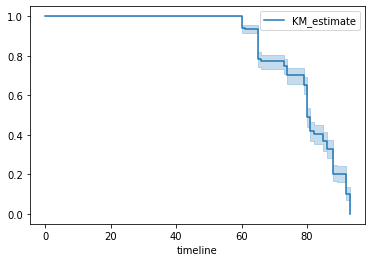

In [18]:
kmf.plot()

In [19]:
kmf.median_survival_time_

80.0

### 分组分析 ###

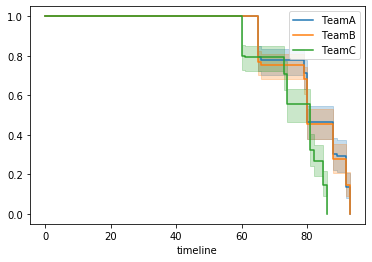

In [20]:
ax=plt.subplot(111)


for i in np.unique(data['team']):
    kmf.fit(durations=data['lifetime'][data['team'] == str(i)], event_observed=data['broken'][data['team']==str(i)], label=str(i))
    kmf.plot(ax=ax)


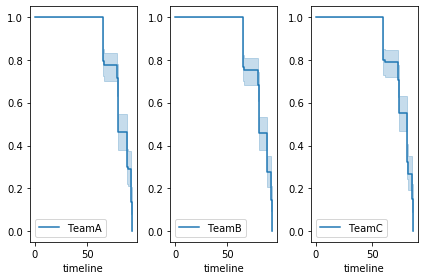

In [21]:
for n, i in enumerate(np.unique(data['team'])):
    ax=plt.subplot(1,3, n+1)
    kmf.fit(durations=data['lifetime'][data['team'] == str(i)], event_observed=data['broken'][data['team']==str(i)], label=str(i))
    kmf.plot(ax=ax)

plt.tight_layout()


### 生存曲线显著性统计###

In [22]:
from lifelines.statistics import logrank_test

res = logrank_test(data['lifetime'][data['team'] == "TeamB"], data['lifetime'][data['team'] == "TeamC"], 
                   data['broken'][data['team']=="TeamB"], data['broken'][data['team']=="TeamC"])

res.print_summary()

### 风险率估计###

In [23]:
from  lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T, event_observed=E)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 1000 total observations, 603 right-censored observations>

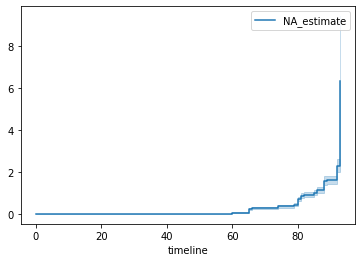

In [24]:
naf.plot()

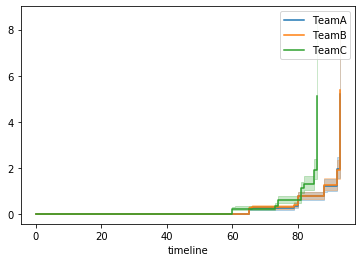

In [25]:
ax=plt.subplot(111)


for i in np.unique(data['team']):
    naf.fit(durations=data['lifetime'][data['team'] == str(i)], event_observed=data['broken'][data['team']==str(i)], label=str(i))
    naf.plot(ax=ax)


### 多因素生存回归模型###

In [44]:
# 数据整理
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
data_cph = data.copy()
ohe = OrdinalEncoder()
ohe_col = ohe.fit_transform(data_cph[['team', 'provider']])
data_cph.loc[:, ['team', 'provider']] = ohe_col

In [45]:
data_cph

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,0.0,3.0
1,81,1,72.075938,103.065701,87.271062,2.0,3.0
2,60,0,96.272254,77.801376,112.196170,0.0,0.0
3,86,1,94.406461,108.493608,72.025374,2.0,1.0
4,34,0,97.752899,99.413492,103.756271,1.0,0.0
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,1.0,3.0
996,88,1,116.727075,110.871332,95.075631,0.0,3.0
997,22,0,104.026778,88.212873,83.221220,1.0,0.0
998,78,0,104.911649,104.257296,83.421491,0.0,3.0


In [46]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(data_cph, duration_col='lifetime', event_col='broken')

<lifelines.CoxPHFitter: fitted with 1000 total observations, 603 right-censored observations>

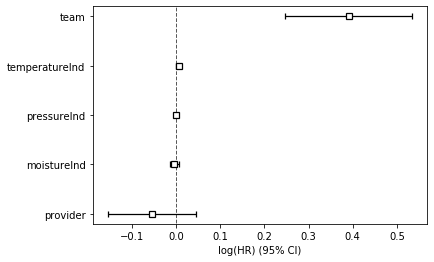

In [47]:
cph.plot()

In [48]:
cph.print_summary()

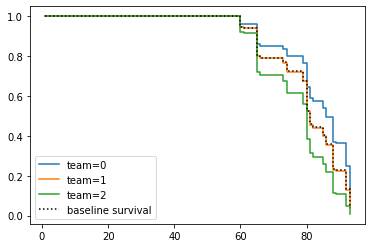

In [49]:
cph.plot_covariate_groups(covariates='team', values=[0, 1, 2])

In [50]:
dir(cph)

['AIC_partial_',
 '_ALLOWED_RESIDUALS',
 '_KNOWN_MODEL',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_batch_mode',
 '_censoring_type',
 '_check_values_post_fitting',
 '_check_values_pre_fitting',
 '_class_name',
 '_clusters',
 '_compute_baseline_cumulative_hazard',
 '_compute_baseline_hazard',
 '_compute_baseline_hazards',
 '_compute_baseline_survival',
 '_compute_confidence_intervals',
 '_compute_delta_beta',
 '_compute_deviance',
 '_compute_martingale',
 '_compute_p_values',
 '_compute_sandwich_estimator',
 '_compute_scale_schoenfeld',
 '_compute_scaled_schoenfeld',
 '_compute_schoenfeld',
 '_compute_schoenfeld_within_strata',
 '_compute_scor

In [51]:
# 预测损坏时间
life_pre = cph.predict_median(data_cph)

In [52]:
data_cph['predict_broken'] = life_pre

In [53]:
data_cph['RemainingLT'] = data_cph['predict_broken'] - data_cph['lifetime']

In [54]:
data_cph

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider,predict_broken,RemainingLT
0,56,0,92.178854,104.230204,96.517159,0.0,3.0,88.0,32.0
1,81,1,72.075938,103.065701,87.271062,2.0,3.0,80.0,-1.0
2,60,0,96.272254,77.801376,112.196170,0.0,0.0,82.0,22.0
3,86,1,94.406461,108.493608,72.025374,2.0,1.0,80.0,-6.0
4,34,0,97.752899,99.413492,103.756271,1.0,0.0,80.0,46.0
...,...,...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,1.0,3.0,82.0,-6.0
996,88,1,116.727075,110.871332,95.075631,0.0,3.0,88.0,0.0
997,22,0,104.026778,88.212873,83.221220,1.0,0.0,81.0,59.0
998,78,0,104.911649,104.257296,83.421491,0.0,3.0,88.0,10.0


In [68]:
# 按照预期寿命进行排序
res_order = data_cph.sort_values(by='RemainingLT', ascending=True)

In [69]:
res_order

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider,predict_broken,RemainingLT
467,92,1,114.237532,104.460985,139.940768,1.0,1.0,80.0,-12.0
404,92,1,120.184206,82.465578,132.258599,1.0,1.0,80.0,-12.0
489,93,1,68.438051,87.659960,91.919218,1.0,1.0,81.0,-12.0
652,92,1,106.057901,80.751354,111.462918,1.0,1.0,80.0,-12.0
181,92,1,134.952604,88.480101,108.677366,1.0,1.0,80.0,-12.0
...,...,...,...,...,...,...,...,...,...
740,2,0,113.609094,83.462671,104.122491,0.0,2.0,86.0,84.0
224,3,0,110.735068,113.291776,54.532869,0.0,1.0,88.0,85.0
471,2,0,81.963991,82.559906,69.815722,0.0,1.0,88.0,86.0
605,2,0,69.045801,104.214614,83.076602,0.0,2.0,88.0,86.0


In [70]:
no_broken = res_order[res_order['broken'] == 0 ]

In [71]:
no_broken

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider,predict_broken,RemainingLT
222,88,0,79.906159,77.433386,71.169472,1.0,1.0,81.0,-7.0
428,88,0,103.106906,100.227663,70.156129,1.0,1.0,82.0,-6.0
79,88,0,112.605330,100.274341,87.983631,1.0,3.0,82.0,-6.0
562,85,0,109.626240,99.704141,112.418279,2.0,1.0,80.0,-5.0
531,86,0,76.196648,102.691901,95.976970,1.0,1.0,81.0,-5.0
...,...,...,...,...,...,...,...,...,...
740,2,0,113.609094,83.462671,104.122491,0.0,2.0,86.0,84.0
224,3,0,110.735068,113.291776,54.532869,0.0,1.0,88.0,85.0
471,2,0,81.963991,82.559906,69.815722,0.0,1.0,88.0,86.0
605,2,0,69.045801,104.214614,83.076602,0.0,2.0,88.0,86.0


# 尝试onehot统计的结果
这个结果跟教程的一摸一样。就很棒！！！

In [72]:
data = pd.read_csv("DATA_4.03_MNT.csv")

In [84]:
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()
col_ohe = ohe.fit_transform(data[['team', 'provider']]).toarray()

In [95]:
ohe.get_feature_names()

array(['x0_TeamA', 'x0_TeamB', 'x0_TeamC', 'x1_Provider1', 'x1_Provider2',
       'x1_Provider3', 'x1_Provider4'], dtype=object)

In [100]:
ohe_df = pd.DataFrame(col_ohe, columns=ohe.get_feature_names())

In [101]:
ohe_df

,x0_TeamA,x0_TeamB,x0_TeamC,x1_Provider1,x1_Provider2,x1_Provider3,x1_Provider4
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,1.0,0.0,0.0,0.0,0.0,0.0,1.0
997,0.0,1.0,0.0,1.0,0.0,0.0,0.0
998,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [102]:
data_ohe = pd.merge(data, ohe_df, right_index=True, left_index=True)

In [103]:
data_ohe

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider,x0_TeamA,x0_TeamB,x0_TeamC,x1_Provider1,x1_Provider2,x1_Provider3,x1_Provider4
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,81,1,72.075938,103.065701,87.271062,TeamC,Provider4,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,86,1,94.406461,108.493608,72.025374,TeamC,Provider2,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4,1.0,0.0,0.0,0.0,0.0,0.0,1.0
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [108]:
model_col = [x for x in data_ohe.columns if x != 'team' and x != 'provider']
model_data = data_ohe[model_col]

In [109]:
model_data

,lifetime,broken,pressureInd,moistureInd,temperatureInd,x0_TeamA,x0_TeamB,x0_TeamC,x1_Provider1,x1_Provider2,x1_Provider3,x1_Provider4
0,56,0,92.178854,104.230204,96.517159,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,81,1,72.075938,103.065701,87.271062,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,60,0,96.272254,77.801376,112.196170,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,86,1,94.406461,108.493608,72.025374,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,34,0,97.752899,99.413492,103.756271,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,88,1,116.727075,110.871332,95.075631,1.0,0.0,0.0,0.0,0.0,0.0,1.0
997,22,0,104.026778,88.212873,83.221220,0.0,1.0,0.0,1.0,0.0,0.0,0.0
998,78,0,104.911649,104.257296,83.421491,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [111]:
from lifelines import CoxPHFitter
# 这里出现了共线性，可以通过log_test检验排除，也可以通过惩罚项排除。我喜欢惩罚项。
cph = CoxPHFitter(penalizer=0.1)
cph.fit(model_data, duration_col='lifetime', event_col='broken')

<lifelines.CoxPHFitter: fitted with 1000 total observations, 603 right-censored observations>

In [112]:
cph.print_summary()

In [116]:
life_time = cph.predict_median(model_data)
life_time

0      88.0
1      81.0
2      80.0
3      88.0
4      80.0
       ... 
995    88.0
996    88.0
997    80.0
998    88.0
999    80.0
Name: 0.5, Length: 1000, dtype: float64

In [137]:
res = pd.DataFrame(life_time)
res.columns=['Ebreak']

In [138]:
type(res)

pandas.core.frame.DataFrame

In [140]:
res['lifetime'] = model_data['lifetime']
res['broken'] = model_data['broken']
res['RemainingLT'] = res['Ebreak'] - res['lifetime']

In [151]:
res2 = res.sort_values(by='RemainingLT')[res['broken'] == 0]

/home/zhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [147]:
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
pressureInd,0.000553,1.000553,0.002267,-0.003891,0.004997,0.996117,1.005009,0.243940,8.072770e-01,0.308864
moistureInd,-0.004180,0.995829,0.004660,-0.013314,0.004954,0.986774,1.004966,-0.896910,3.697672e-01,1.435311
temperatureInd,0.007597,1.007626,0.002349,0.002994,0.012200,1.002998,1.012275,3.234746,1.217510e-03,9.681851
x0_TeamA,-0.413289,0.661471,0.140662,-0.688982,-0.137596,0.502087,0.871450,-2.938167,3.301595e-03,8.242621
x0_TeamB,-0.408571,0.664599,0.139112,-0.681226,-0.135916,0.505996,0.872916,-2.936984,3.314211e-03,8.237119
x0_TeamC,0.872106,2.391942,0.147428,0.583153,1.161058,1.791678,3.193311,5.915482,3.309058e-09,28.170932
x1_Provider1,0.670198,1.954624,0.151077,0.374092,0.966304,1.453671,2.628212,4.436133,9.158933e-06,16.736389
x1_Provider2,-2.124470,0.119496,0.160699,-2.439434,-1.809507,0.087210,0.163735,-13.220221,6.706659e-40,130.131529
x1_Provider3,2.699763,14.876209,0.176974,2.352900,3.046626,10.516026,21.044221,15.255135,1.521803e-52,172.134479
x1_Provider4,-1.143803,0.318605,0.153146,-1.443963,-0.843642,0.235991,0.430141,-7.468712,8.098345e-14,43.489366


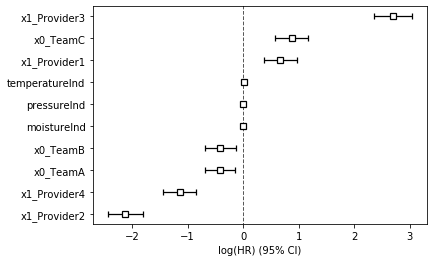

In [144]:
cph.plot()

80.0


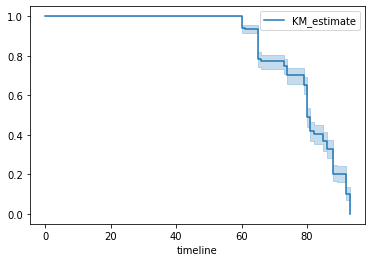

In [150]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations=model_data['lifetime'], event_observed=model_data['broken'])
print(kmf.median_survival_time_)
kmf.plot()

In [156]:
# 这些电脑使用寿命低于 中位数
problem_pc = res[(res['lifetime'] <= kmf.median_survival_time_) & (res['broken'] == 1)]
problem_pc

,Ebreak,lifetime,broken,RemainingLT
7,65.0,65,1,0.0
12,65.0,65,1,0.0
13,65.0,65,1,0.0
15,80.0,80,1,0.0
17,80.0,80,1,0.0
...,...,...,...,...
984,66.0,66,1,0.0
990,65.0,65,1,0.0
992,65.0,60,1,5.0
993,65.0,65,1,0.0


# 既然是建模，必然有模型选择的步骤。这里省略了该步骤。